**Mengunduh file-file yang diperlukan**

In [ ]:
!pip install -q dtreeviz

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/Syauqi99/datadataworkshoppython/master/test_data(case1).csv", "test_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/Syauqi99/datadataworkshoppython/master/train_data(case1).csv", "train_data.csv")

('train_data.csv', <http.client.HTTPMessage at 0x7fea5f26de50>)

In [ ]:
# memasukan library yang relevan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Business Understanding


<p align="justify">
Pemerintah Washington D.C. menyediakan sepeda yang dapat disewa untuk berkeliling kota lewat program Capital Bikeshare-nya. Sepeda ini dapat diambil kapan saja dan dikembalikan kapan saja. Sepeda ditaruh pada suatu stasiun seperti pada Gambar 1. Apabila ingin meminjam sepeda maka harus menempelkan tiket kepada sepeda tersebut. Ada dua tipe tiket yaitu tiket jangka panjang dan tiket sekali jalan. Harga dari kedua tiket ini tidak diketahui.
</p>

<figure>
<center>
<img src="https://www.ase.org/sites/ase.org/files/styles/featured_blog/public/bike_share2_0_website.png?itok=lL_t-9r1" width="500" />
<figcaption> Gambar 1 - Contoh Bikesharing (sumber: UC Berkley AIM) </figcaption></center>
</figure>

<p align="justify">
Saat ini pemerintah Washington D.C. ingin mengetahui tentang pola dari permintaan sepeda. Terutama mereka ingin tahu apakah perlu menambah jumlah sepeda dan kapan waktu yang baik untuk melakukan perawatan terhadap sepeda. Perlu diperhatikan bahwasannya pemerintah hanya bisa melakukan perawatan pada satu hari sekaligus.
</p>

<p align="justify">
Waktu perawatan yang tepat didefinisikan oleh pemerintah sebagai waktu saat demand cenderung sedikit sehingga tidak banyak terjadi lost sales. Untuk mengetahui hal ini pemerintah dapat membuat model prediksi variabel-variabel yang berkaitan dengan waktu dan cuaca sebagai variabel independen dan permintaan sepeda sebagai variabel dependen.
</p>

<p align="justify">
Objektif kedua adalah menentukan apakah perlu meningkatkan jumlah sepeda yang dimiliki. Agar pemerintah dapat menentukan peningkatan kapasitas sepeda maka yang harus dilakukan adalah memprediksi permintaan sepeda. Alhasil dapat ditentukan apakah perlu meningkatkan jumlah dari sepeda atau tidak. Model pertama yang digunakan untuk memprediksi permintaan dari variabel waktu dan cuaca dapat juga digunakan untuk kasus ini. Alhasil anda hanya perlu membuat satu buah model untuk menyelesaikan permasalahan ini yaitu:
</p>

<p align="center">
<b>“Model untuk memprediksi permintaan sepeda berdasarkan variabel waktu dan cuaca“ </b>
</p>

# Data Understanding
<p align="justify">
Tahap awal setelah memahami tujuan bisnis yang ingin dicapai dengan bantuan data mining maka langkah selanjutnya adalah memahami data yang tersedia. Untuk melakukan hal ini kita akan menggunakan dua buah <i>library</i> yaitu matplotlib dan pandas.
</p>
<br>

<table style="width: 528px;">
<tbody>
<tr style="height: 41px;">
<td style="width: 24px; height: 41px;"><strong>No</strong></td>
<td style="width: 112px; height: 41px;"><strong>&nbsp;Nama Kolom</strong></td>
<td style="width: 391px; height: 41px;"><strong>Deskripsi</strong></td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">1</td>
<td style="width: 112px; height: 21px;">&nbsp;datetime</td>
<td style="width: 391px; height: 21px;">Tahun &ndash; bulan &ndash; hari jam</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">2</td>
<td style="width: 112px; height: 21px;">&nbsp;season</td>
<td style="width: 391px; height: 21px;">1 = musim semi<br />2 = musim panas <br />3 = musim kemarau<br />4 = musing dingin</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">3</td>
<td style="width: 112px; height: 21px;">&nbsp;workingday</td>
<td style="width: 391px; height: 21px;">Hari kerja umum yaitu saat bukan hari libur dan bukan weekend</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">4</td>
<td style="width: 112px; height: 21px;">&nbsp;weather</td>
<td style="width: 400px; height: 21px;">1: Cerah, sedikit awan, sebagian berawan<br />2: Kabut + Mendung, Kabut + Sedikit awan, Kabut saja <br />3: Sedikit bersalju, gerimis + petir, gerimis + sedikit awan, <br />petir + berawan<br />4: Hujan lebat, Hujan badai, Badai salju, Hujan es</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">5</td>
<td style="width: 112px; height: 21px;">&nbsp;temp</td>
<td style="width: 391px; height: 21px;">Temperatur rata-rata statsiun sepeda (Derajat Celcius)</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">6</td>
<td style="width: 112px; height: 21px;">&nbsp;atemp</td>
<td style="width: 391px; height: 21px;">Temperatur yang dirasakan orang sekitar (Derajat Celcius)</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">7</td>
<td style="width: 112px; height: 21px;">&nbsp;humidity</td>
<td style="width: 391px; height: 21px;">Tingkat kelembapan relatif</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">8</td>
<td style="width: 112px; height: 21px;">&nbsp;windspeed</td>
<td style="width: 391px; height: 21px;">Kecepatan angin (satuan tidak diketahui)</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">9</td>
<td style="width: 112px; height: 21px;">&nbsp;casual</td>
<td style="width: 391px; height: 21px;">Jumlah sepeda yang disewa oleh pembeli tiket sekali jalan</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">10</td>
<td style="width: 112px; height: 21px;">&nbsp;registered</td>
<td style="width: 391px; height: 21px;">Jumlah sepeda yang disewa oleh pembeli tiket mingguan / bulanan / tahunan</td>
</tr>
<tr style="height: 21px;">
<td style="width: 24px; height: 21px;">11</td>
<td style="width: 112px; height: 21px;">&nbsp;count</td>
<td style="width: 391px; height: 21px;">Total jumlah sepeda yang disewa</td>
</tr>
</tbody>
</table>

<p align='justify'>
Tabel di atas menunjukkan penjelasan dari setiap kolom data. Tujuan akhir kita adalah membuat sebuah model. Model yang ingin kita buat akan memprediksi <i>count</i> alhasil <i>count</i>  sering disebut sebagai  <i>target variable</i> atau dalam statistik dependent variable. Untuk kolom lainnya yang digunakan untuk memprediksi permintaan sepeda (datetime, season, workingday, dll.) disebut sebagai predictor variables atau dalam statistik disebut independent variables. Pada modul ini kita ambil kesepakatan untuk memakai istilah <i>target variable</i> dan <i>predictor variables</i>. Untuk memahami datanya secara lebih lanjut maka kita harus mengolah data ini secara lebih jauh.
</p>

<p align='justify'>
Pemerintah meminta kita untuk melakukan prediksi permintaan per jam biarpun pada akhirnya yang akan digunakan adalah permintaan per hari. Hal ini disebabkan pemerintah ingin juga mengetahui waktu yang tepat untuk melakukan <i>maintanance</i> baik terhadap sepeda ataupun <i>server</i>. Selain itu diberikan juga faktor cuaca mengingat prediksi cuaca sangat mudah didapat dan cuaca diduga akan berpengaruh terhadap permintaan.
</p>

<p align='justify'>
Sebelum melakukan pengolahan data biasanya kita sudah membagi data menjadi dua buah. Pertama yaitu data train dan yang kedua yaitu data test. Data train merupakan data yang nanti akan digunakan untuk “melatih” model sedangkan data test digunakan untuk mengecek performansi dari model. Data test biasanya merupakan data setelah waktu analisis. Misalkan jika kita melakukan analisis hingga pembuatan model pada tanggal 28 Agustus 2020 maka data train adalah data yang tersedia hingga 28 Agustus 2020 sedangkan data test adalah data yang tersedia setelah 28 Agustus 2020.  

Untuk kasus ini data train test dipisah berdasarkan awal dan akhir bulan. Untuk lebih detailnya akan kita lihat di bagian data exploration
</p>

## Loading Data
<p align="justify">
Data yang kita miliki berformat tabel (csv, xlsx, dan lain-lain) alhasil digunakan pandas untuk membuka data pada program python. Data yang sudah dibuka akan ditaruh pada suatu variabel. Biasanya beberapa hal yang harus dilakukan setelah menaruh data pada variabel adalah melihat beberapa baris data dan melihat <i>summary</i> dari data yang dimiliki.
</p>

<p align="justify">


**1. Load data csv**

In [ ]:
# loading data
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
# untuk membuka data csv digunakan pd.read_csv

# buat data duplikat untuk ditelaah lebih jauh
data = pd.concat((train,test))

**2. Tampilkan Deskripsi Data**

In [ ]:
# Lihatlah penjelasan deskriptif dari data
# pastikan kolom train dan test memiliki statistik yang mirip
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Lihatlah penjelasan deskriptif dari data
# pastikan kolom train dan test memiliki statistik yang mirip
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2.497981,0.029046,0.685927,1.433364,20.675387,24.074327,64.067102,12.611850,35.213886,151.376825,186.590711
std,1.088979,0.167949,0.464182,0.643910,8.037098,8.758622,19.283197,8.242024,48.189692,152.134074,181.971613
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,4.000000,32.000000,37.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,17.000000,112.000000,138.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,48.000000,216.000000,275.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,347.000000,885.000000,976.000000


**3. Tampilkan 5 Data teratas**

In [ ]:
# melihat 5 data teratas
# Gunakan perintah head(n) misal train.head(5)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**4. Tampilkan nama-nama kolom**

In [ ]:
# melihat ada kolom apa saja pada data
# gunakan perintah columns misal train.columns
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


<p align= "justify">
Perlu diperhatikan bahwasannya fungsi describe() hanya akan memberikan ringkasan dari kolom yang memiliki tipe numerik. Selain itu tidak semua deskripsi dari tiap kolom memiliki arti yang bermakna.
</p>
<p align= "justify">
Mari tidak usah perhatikan tiga kolom pertama karena hanya memberikan informasi yang berkaitan dengan waktu. Dapat dilihat bahwasannya kebanyakan cuaca di Washington D.C. bertipe 1 atau 2 (kuartil 25%, 50%, dan 75%) artinya jarang sekali terjadi cuaca buruk. Untuk humiditas, temperatur, dan kecepatan angin tentu saja bervariasi terhadap waktu tetapi dari deskripsi sederhana ini dapat dikatakan suhu cenderung berada pada 25 derajat celcius dengan humiditas cukup normal dan angin yang cukup normal pula. Selain itu dapat dilihat bahwasannya pengendara casual jumlahnya jauh lebih sedikit dibandingkan pengendara registered. Dapat dismpulkan kebanyakan pelanggan adalah pelanggan loyal.
</p>

## Data Exploration

**Data Quality Check**

Pertama mari cek apakah terdapat data yang duplikat. Dapat dilihat bahwasannya tidak terdapat duplikat pada data

**5. Cek Apakah terdapat duplikasi data**

In [ ]:
train.duplicated().any()

False

Mari cek apakah ada data yang hilang. Dari plot di bawah terlihat bahwasannya tidak ada data yang hilang. Tapi apakah memang tidak ada data yang hilang?

**6. Cek apakah terdapat missing value**

In [ ]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Data Exploration: Times related columns**


<p align ="justify">
Pada bagian ini kita akan mulai melakukan eksplorasi pada data yang berkaitan dengan waktu. Tujuannya adalah menemukan beberapa insight yang dapat membantu kita saat nanti membuat model. Mula-mula mari buat beberapa kolom baru dari kolom datetime seperti hari, minggu, bulan, dan jam untuk memudahkan kita saat analisis. Jika ingin mengetahui tentang fungsi-fungsi yang berkaitan dengan datetime, anda dapat mengakses <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components"> link ini </a>
</p>

**7. Buat kolom baru berupa pecahan dari datetime seperti day, month, hour, dll**

In [ ]:
# cek tipe kolom
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# mengubah tipe kolom 'datetime' dari object (string) menjadi datetime
train['datetime'] = pd.to_datetime(train['datetime'])

# membuat kolom baru dari datetime
train['date'] = train['datetime'].dt.date # mengambil date tanpa times
train['dayofweek'] = train['datetime'].dt.dayofweek # mengambil day of week
train['month'] = train['datetime'].dt.month # mengambil month
train['hour'] = train['datetime'].dt.hour # mengambil hour
train['week'] = train['datetime'].dt.weekofyear # mengambil week of year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


**8. tampilkan kolom datetime seperti day, month, hour, dll**

In [ ]:
# tampilkan date, dayofweek, month, hour dan week
train[['date','dayofweek','month','hour','week']]

,date,dayofweek,month,hour,week
0,2011-01-01,5,1,0,52
1,2011-01-01,5,1,1,52
2,2011-01-01,5,1,2,52
3,2011-01-01,5,1,3,52
4,2011-01-01,5,1,4,52
...,...,...,...,...,...
10881,2012-12-19,2,12,19,51
10882,2012-12-19,2,12,20,51
10883,2012-12-19,2,12,21,51
10884,2012-12-19,2,12,22,51


<p align="justify">
Jika sedikit kebingungan dengan maksud sintaks di atas berikut adalah penjelasannya
</p>

- Date artinya tanggal saat itu
- Day of week menandakan hari pada minggu ini ( 0 = Senin, 1 = Selasa, 2 = Rabu, 3 = Kamis, 4 = Jumat, 5 = Sabtu, 6 = Minggu)
- Month artinya bulan (e.g. 1 = januari) saat itu
- Hour artinya jam saat itu
- Week artinya minggu ke berapa pada saat itu ( 1= minggu tanggal 1 Januari - 7 Januari)

**Times related columns with total demand**

<p align="justify">
Sekarang mari kita coba mengeksplorasi kolom yang berkaitan dengan waktu untuk memahami data secara lebih jauh. Secara umum kita ingin mencari tahu mengenai hal seperti tren, hubungan, dan pola dari setiap kolom terutama antara kolom prediktor dan kolom target. Untuk kasus ini tentu tidak ada artinya melakukan analisis secara univariat (hanya satu kolom) karena kolom waktu tidak memiliki arti apa-apa jika sendiri (sekali lagi untuk kasus ini). Oleh karena itu analisis dilakukan secara bivariat antara kolom waktu dan kolom permintaan (count).
</p>

**9. Hitung demand per hari**

In [ ]:
# pertama mari kita hitung dalam tiap harinya rata-rata demand per jamnya berapa
daily_demand = train.groupby('date')['count'].mean()

**10. Visualisasikan rata-rata demand per jam per hari**

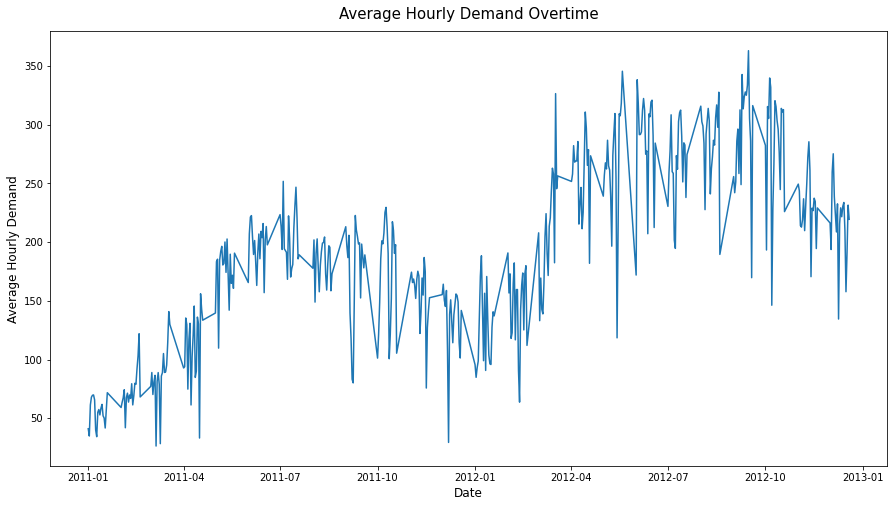

In [ ]:
# langkah selanjutnya adalah memvisualisasikannya
# plt.figure() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

# Beri judul plot
# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("Average Hourly Demand Overtime", fontdict={'fontsize': '15'}, pad = 12)

# Beri judul pada sumbu X dan sumbu Y
# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("Average Hourly Demand", fontdict={'fontsize': '12'})

# Plot demand perjam pada tiap waktu
ax.plot(daily_demand.index, daily_demand)
plt.show()

<p align='justify'>
Ada beberapa hal yang menarik dari data ini. Pertama, tren permintaan per jam cenderung untuk meningkat sepanjang waktu. Lalu, terdapat pola seasonal dari permintaan sepeda yang cukup menarik untuk kita eksplorasi secara lebih jauh. Untuk saat ini mari kita lihat apakah untuk jenis permintaan yang berbeda (casual dan registered) pola dan tren yang dimiliki sama?
</p>

**11. Ambil daily demand data casual dan registered user**

In [ ]:
# mari ambil dua buah data yaitu daily demand untuk casual dan registered user
daily_demand_casual = train.groupby('date')['casual'].mean()
daily_demand_registered = train.groupby('date')['registered'].mean()

**12. Badingkan demand casual dan registered**

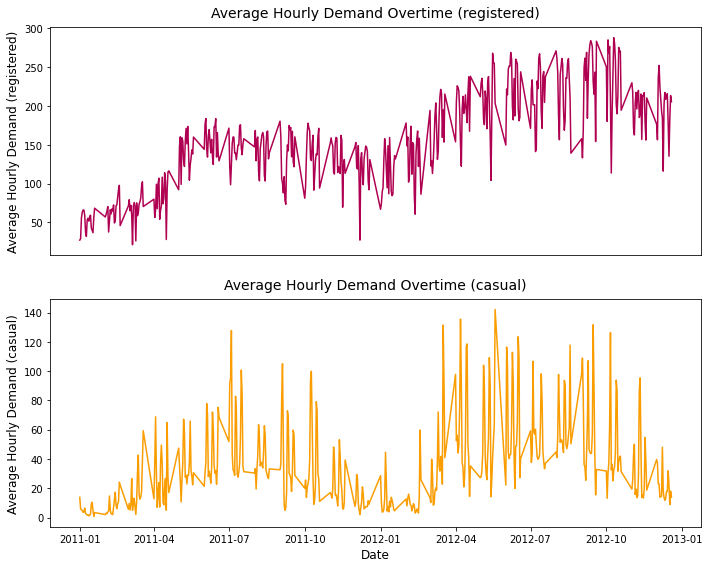

In [ ]:
# buat kanvas kosong untuk ditambahkan visualisasi
fig = plt.figure(figsize=(10,8))

# bagi kanvas menjadi dua bagian yaitu atas dan bawah
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot

ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211, sharex=ax1)

ax2.xaxis.set_visible(False)
ax2.set_title("Average Hourly Demand Overtime (registered)", fontdict={'fontsize': '14'}, pad = 10)
ax1.set_title("Average Hourly Demand Overtime (casual)", fontdict={'fontsize': '14'}, pad = 10)
ax2.set_ylabel("Average Hourly Demand (registered)", fontdict={'fontsize': '12'})
ax1.set_ylabel("Average Hourly Demand (casual)", fontdict={'fontsize': '12'})
ax1.set_xlabel("Date", fontdict={'fontsize': '12'})

ax1.plot(daily_demand_casual.index, daily_demand_casual, color='#FA9D00')
ax2.plot(daily_demand_registered.index, daily_demand_registered, color = '#B00051')

 # untuk memastikan tidak ada yang tabrakan
fig.tight_layout()

<p align="justify">
Jika dibandingkan permintaan casual dan registered kurang lebih memiliki pola yang cukup mirip. Hanya saja untuk permintaan bertipe casual tidak ada pertumbuhan. Dari gambar juga terlihat bahwasannya kebanyakan permintaan memiliki tipe registered. Permintaan registered juga cenderung lebih tersebar dibandingkan dengan casual.
</p>

**13. Hitung standar deviasi dari tiap jenis permintaan**

In [ ]:
print("Casual std: ", daily_demand_casual.std())
print("Registered std: ",daily_demand_registered.std())

# Alternatif: bisa juga pakai np.std(), tanpa bessel's correction


Casual std:  29.109048821438567
Registered std:  61.87729047279744


Dari data terlihat seperti data memiliki suatu pola tertentu. Mungkin ini adalah efek dari season di amerika. Berhubung amerika memiliki empat buah musim. Kita pasti menduga orang cenderung lebih sering memakai sepeda saat summer dibandingkan saat winter. Mari kita lihat seperti apa polanya

**14. Hitung rata-rata permintaan pada tiap season**



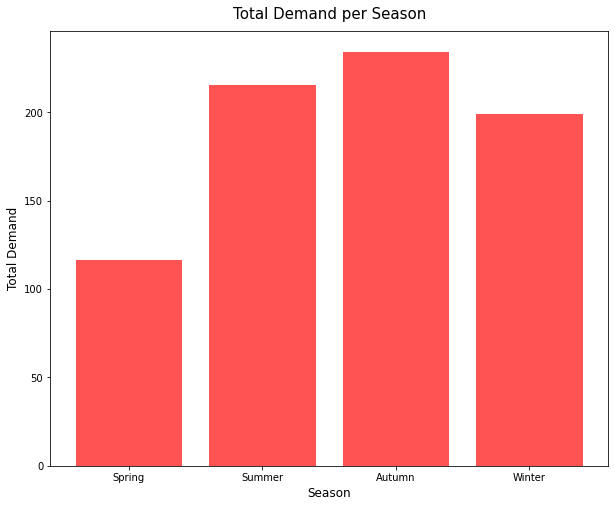

In [ ]:
# group data per mean
season_demand = train.groupby('season')['count'].mean()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# buatlah bar plot
ax.bar(x = season_demand.index, height=season_demand, color='#FF5252')

# memberi label ulang pada sumbu horizontal chart
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Spring','Summer','Autumn','Winter'])

# tambah judul
ax.set_title("Total Demand per Season", fontdict={'fontsize': '15'}, pad = 12)
# tambah label sumbu x
ax.set_xlabel("Season", fontdict={'fontsize': '12'})
# tambah label sumbu y
ax.set_ylabel("Total Demand", fontdict={'fontsize': '12'})

# tampilkan plot
plt.show()

<p align='justify'>
Cukup menarik jika kita perhatikan. Ternyata permintaan terendah bukan terjadi pada masa musim dingin melainkan pada musim semi. Selain itu permintaan tertinggi terjadi saat musim gugur lalu diikuti oleh musim panas. Ada beberapa kemungkinan. Pertama saat awal program diluncurkan tidak banyak sepeda yang tersedia alhasil total sepeda yang disewa tentunya tidak banyak. Alasan lainnya yang mungkin adalah program ini baru terkenal saat musim panas. Atau memang musim semi tidak disukai untuk bersepeda. Tentu saja visualisasi biasa tidak mungkin bisa memberitahu kita banyak. Saat pemodelan nanti kita akan tahu apakah memang season berpengaruh pada <i>demand</i> dan bentuk pengaruhnya seperti apa.
</p>

**15. Hitung rata-rata permintaan pada tiap season dibagi kedalam casual dan registered**

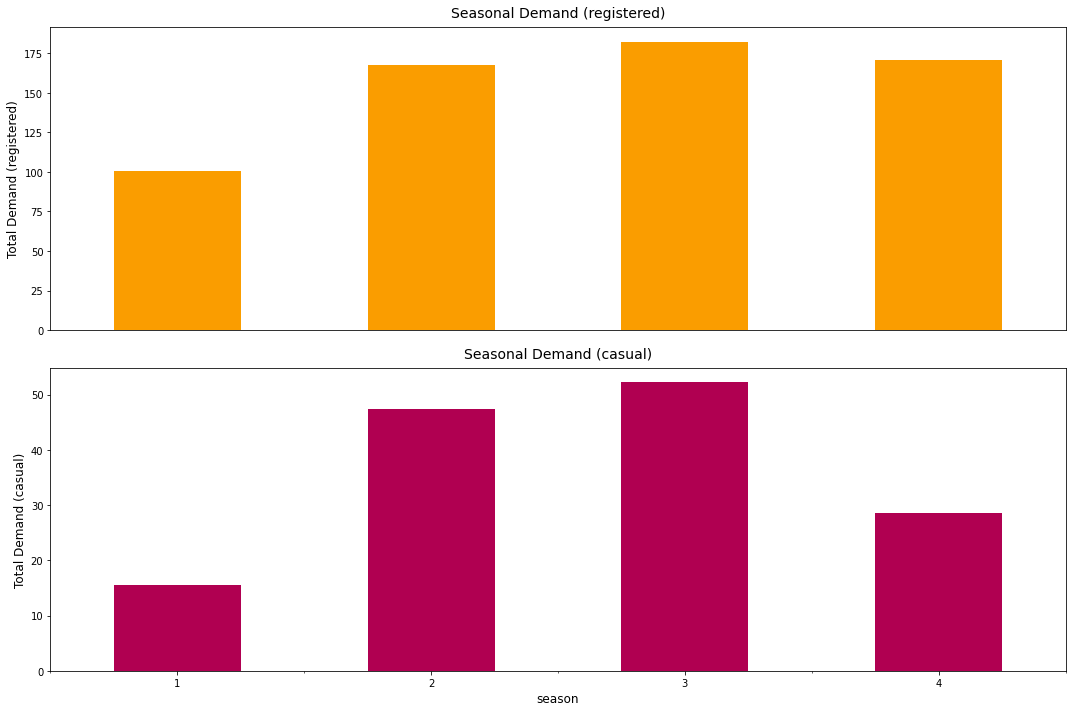

In [ ]:
# hitung permintaan pada tiap tipe di setiap season
seasonal_demand_casual = train.groupby('season')['casual'].mean()
seasonal_demand_registered = train.groupby('season')['registered'].mean()

# buat kanvas kosong untuk ditambahkan visualisasi
fig = plt.figure(figsize=(15,10))

# bagi kanvas menjadi dua bagian yaitu atas dan bawah
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot
# buat kedua bagian menggunakan sumbu x yang sama
ax2 = fig.add_subplot(212)
ax1 = fig.add_subplot(211, sharex=ax2)

ax1.xaxis.set_visible(False)
#tambahkan judul untuk tiap bagian
ax1.set_title("Seasonal Demand (registered)", fontdict={'fontsize': '14'}, pad = 10)
ax2.set_title("Seasonal Demand (casual)", fontdict={'fontsize': '14'}, pad = 10)

# tambahkan judul untuk sumbu x dan sumbu y
ax1.set_ylabel("Total Demand (registered)", fontdict={'fontsize': '12'})
ax2.set_ylabel("Total Demand (casual)", fontdict={'fontsize': '12'})
ax2.set_xlabel("Season", fontdict={'fontsize': '12'})

seasonal_demand_casual.plot(kind='bar', ax=ax2, color='#B00051', rot=0)
seasonal_demand_registered.plot(kind='bar', ax=ax1, color = '#FA9D00')

fig.tight_layout()


<p align="justify">
Pola yang sama juga terlihat pada permintaan casual dan juga permintaan registered. Dengan perbedaan saat winter permintaan casual turun jauh lebih banyak dibandingkan dengan permintaan registered. Terakhir mari lihat distribusi dari total demand per hari, per jam, per bulan, dan per tipe hari (libur atau tidak).
</p>

**16. Hitung total permintaan pada tiap hari, bulan, jam, hari libur dan hari kerja**

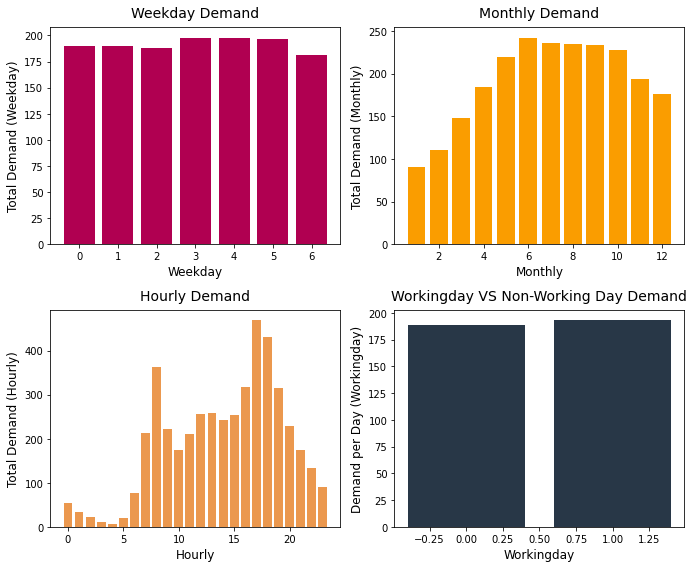

In [ ]:
# demand per hari (weekday)
weekday_demand  = train.groupby('dayofweek')['count'].mean()

# demand per bulan (monthly)
monthly_demand = train.groupby('month')['count'].mean()

# demand per jam (hourly)
hourly_demand  = train.groupby('hour')['count'].mean()

# demand per tipe hari (workingday)
daytype_demand  = train.groupby('workingday')['count'].mean()

# buat kanvas kosong untuk ditambahkan visualisasi
fig = plt.figure(figsize=(10,8))

# bagi kanvas menjadi empat bagian; dua subplot di atas dan dua subplot bawah
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# tambahkan judul pada tiap plot
ax1.set_title("Weekday Demand", fontdict={'fontsize': '14'}, pad = 10)
ax2.set_title("Monthly Demand", fontdict={'fontsize': '14'}, pad = 10)
ax3.set_title("Hourly Demand", fontdict={'fontsize': '14'}, pad = 10)
ax4.set_title("Workingday VS Non-Working Day Demand", fontdict={'fontsize': '14'}, pad = 10)

# tambahkan label pada sumbu y
ax1.set_ylabel("Total Demand (Weekday)", fontdict={'fontsize': '12'})
ax2.set_ylabel("Total Demand (Monthly)", fontdict={'fontsize': '12'})
ax3.set_ylabel("Total Demand (Hourly)", fontdict={'fontsize': '12'})
ax4.set_ylabel("Demand per Day (Workingday)", fontdict={'fontsize': '12'})

# tambahkan label pada sumbu x
ax1.set_xlabel("Weekday", fontdict={'fontsize': '12'})
ax2.set_xlabel("Monthly", fontdict={'fontsize': '12'})
ax3.set_xlabel("Hourly", fontdict={'fontsize': '12'})
ax4.set_xlabel("Workingday", fontdict={'fontsize': '12'})

# buatlah bar plot
ax1.bar(x=weekday_demand.index, height=weekday_demand.values, color='#B00051')
ax2.bar(x=monthly_demand.index,height=monthly_demand.values, color = '#FA9D00')
ax3.bar(x=hourly_demand.index, height=hourly_demand.values, color='#EB984E')
ax4.bar(x=daytype_demand.index, height=daytype_demand.values, color='#283747')

# beri label ulang untuk sumbu horizontal plot kanan bawah
# ax4.set_xticks([0,1])

# rapihkan kanvas
fig.tight_layout()

**17. Lihat lebih lanjut rata-rata permintaan tiap jamnya dipecah per tipe permintaan, apakah terdapat pola yang menarik?**

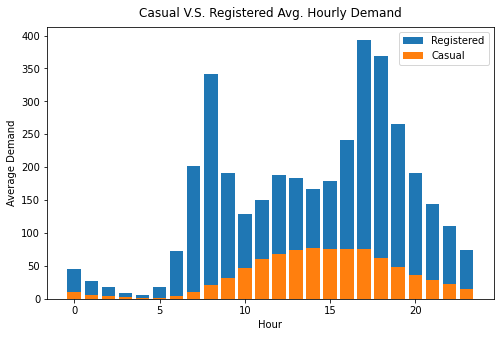

In [ ]:
# pertama pecah permintaan per jam berdasarkan dua tipe
hourly_casual_demand  = train.groupby('hour')['casual'].mean()
hourly_registered_demand  = train.groupby('hour')['registered'].mean()

# buat kanvas kosong untuk ditambahkan visualisasi
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# dalam satu kanvas digabungkan dua visualisasi
ax.bar(hourly_registered_demand.index,hourly_registered_demand.values,label="Registered")
ax.bar(hourly_casual_demand.index,hourly_casual_demand.values,label="Casual")

# buat title dari figure
ax.set_title("Casual V.S. Registered Avg. Hourly Demand", fontdict={'fontsize': '12'}, pad = 10)
ax.set_xlabel("Hour", fontdict={'fontsize': '10'})
ax.set_ylabel("Average Demand", fontdict={'fontsize': '10'})
# tampilkan legenda dari gambar
ax.legend()
fig.show()

<p align="justify">
Gambar di atas menunjukkan perbedaan permintaan antara pengguna casual dan registered. terlihat bahwasannya pengguna registered cenderung memiliki permintaan yang sangat tinggi pada jam kerja. Berbeda dengan pengguna casual yang permintaannya baru tinggi disekitar jam makan siang. Dari pola ini kita dapat menduga bahwasannya pengguna casual menggunakan sepeda kebanyakan untuk berekreasi. Kebanyakan dari pengguna ini kemungkinan besar turis. Sedangkan pengguna regitered kemungkinan besar adalah warga yang bekerja di daerah Washington D.C.
</p>

**Environment Related Variables with Demand**

<p align="justify">
Seperti yang kita ketahui selain data waktu dan permintaan historis terdapat juga beberapa data yang berkaitan dengan lingkungan. Yaitu kondisi cuaca, tempereatur, humiditas, dan kecepatan angin. Pada kasus ini kita akan melakukan analisis secara univariat (per masing-masing kolom) terlebih dahulu untuk mengetahui seperti apa kondisi cuaca di amerika serikat.
</p>

In [ ]:
# tampilkan kolom dari data
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'dayofweek', 'month', 'hour', 'week'],
      dtype='object')

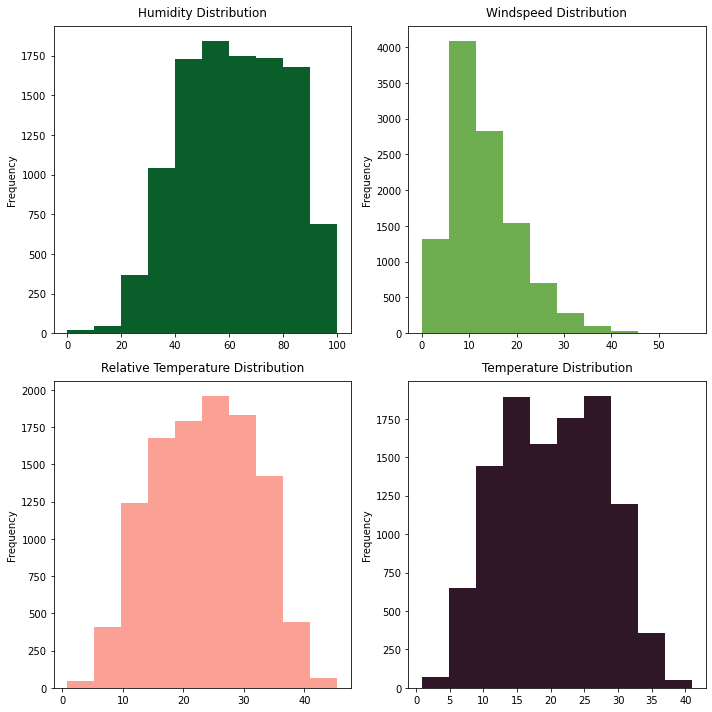

In [ ]:
fig = plt.figure(figsize=(10,10))

# bagi kanvas menjadi empat bagian
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# mari menggunakan plot bawaan dari pandas
# formatnya mirip namun tidak perlu menspesifikasikan beberapa parameter lagi

# masukan nilai kind = hist
# melihat distribusi dari humiditas
train['humidity'].plot(kind='hist', ax=ax1, color = "#0A5E2AFF")

# melihat distribusi kecepatan angin
train['windspeed'].plot(kind='hist', ax=ax2, color = "#6DAC4FFF")

# melihat distribusi temperatur
train['atemp'].plot(kind='hist', ax=ax3, color = "#FAA094FF")

# melihat distribusi temperatur relatif
train['temp'].plot(kind='hist', ax=ax4, color = "#301728FF")

# tambahkan judul untuk tiap plot
ax1.set_title("Humidity Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax2.set_title("Windspeed Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Relative Temperature Distribution", fontdict={'fontsize': '12'}, pad = 10)
ax4.set_title("Temperature Distribution", fontdict={'fontsize': '12'}, pad = 10)

# rapihkan plot
fig.tight_layout()

<p align="justify">
Dapat dilihat humiditas, temperatur, dan relatif temperatur memiliki distribusi normal. Windspeed memiliki distribusi yang terkonsentrasi ke kiri. Lalu jika diperhatikan windspeed memiliki beberapa dengan nilai nol. Hal ini tidak mungkin terjadi secara fisika mari kita lihat berapa banyak windspeed yang bernilai nol.
</p>


In [ ]:
# filter data yang memiliki windspeed 0
zero_wind = train[train['windspeed']==0]

# hitung jumlah data zero_wind dan bagi dengan jumlah data total
print(zero_wind.size / train.size)

0.12061363218813155


<p align="justify">
Terlihat bahwasannya 12% dari kolom windspeed bernilai nol. Hal ini sama saja dengan data windspeed yang hilang. Biasanya nilai yang hilang akan diganti dengan suatu nilai tertentu atau dibuang.

In [ ]:
# hitung jumlah kejadian tiap weather
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<p align="justify">
Dapat dilihat bahwasannya cuaca kebanyakan bertipe 1 atau 2. Kadang cuaca bertipe 3 dan hanya ada satu cuaca bertipe 4. Jika kita perhatikan hal ini cukup membingungkan mengingat amerika sering terkena tornado. Namun, mungkin kota Washington memang jarang terdampak tornado. Perlu data lain untuk memastikan hal ini. Terakhir mari kita lihat seperti apa korelasi antar kolom cuaca ini dan juga korelasi kolom cuaca dengan demand.
</p>

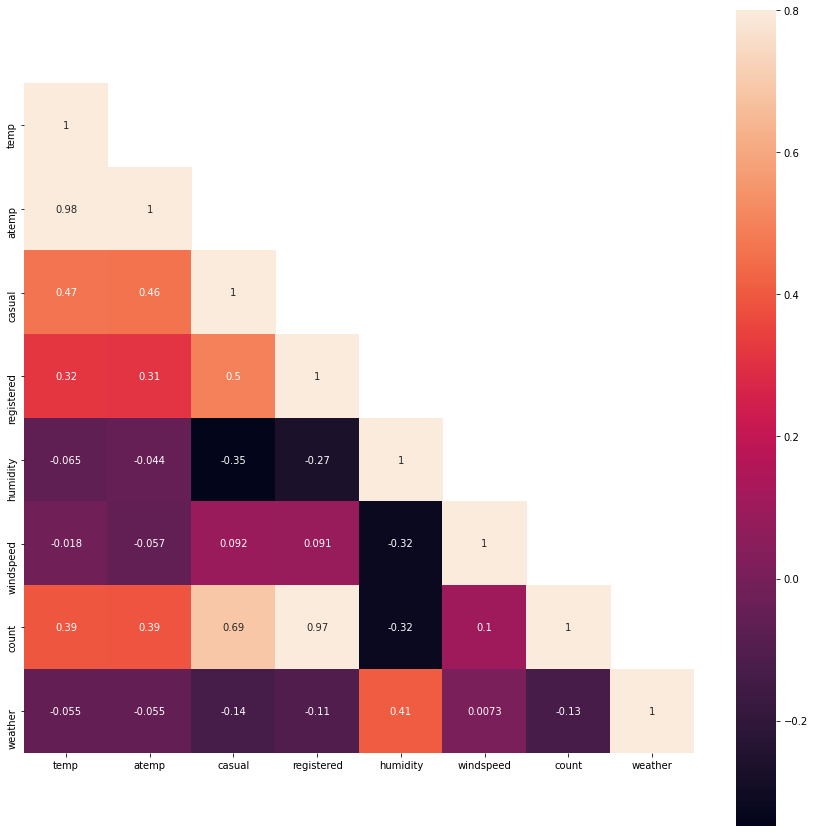

In [ ]:
# tulis kolom yang ingin dianalisis korelasinya
interested_columns = ["temp","atemp","casual","registered","humidity","windspeed","count", "weather"]

# hitung korelasi antar kolom
corr_dat = train[interested_columns].corr()

# visualisasikan korelasinya
# setelah didapatkan matriks korelasi tinggal mengikuti sintaks di bawah ini

mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False

# buatlah kanvas yang sesuai
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

# gunakan library seaborn untuk visualisasi
# masukan ax=ax di dalam heatmap()
sns.heatmap(corr_dat, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

<p align="justify">
Dapat dilihat humiditas memiliki korelasi yang cukup tinggi dengan windspeed dan weather. Hal ini cukup wajar mengingat windspeed dan weather akan menentukan tingkat humiditas. Temperatur relatif (atemp) memliki korelasi yang hampir sempurna dengan temperatur. Dapat dilihat juga bahwasannya windspeed memiliki korelasi yang sangat rendah dengan count, registered, maupun casual.
</p>

<p align="justify">
Semua kolom yang berkaitan dengan cuaca memiliki korelasi sekitar 0.3 - 0.4 dengan total permintaan (count) kecuali kolom windspeed. Hal ini bisa dibilang lampu hijau untuk menggunakan kolom-kolom cuaca dalam model terutama bila model memiliki tipe linear.
</p>

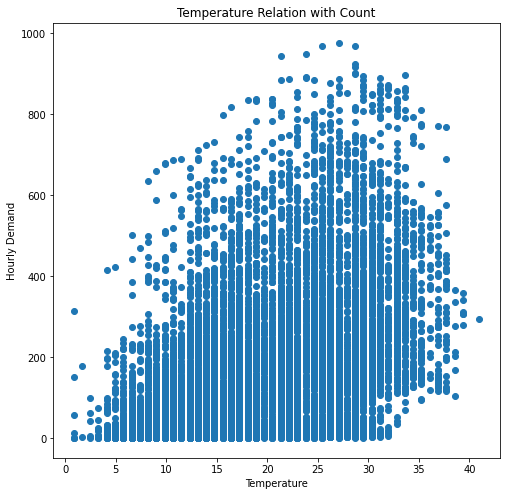

In [ ]:
# terakhir mari lihat bagaimana hubungan antara temperatur dan count dengan menggunakan scatter plot

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

# buatlah scatter plot antara temp dan count
# gunakan perintah ax1.scatter
ax1.scatter(train['temp'], train['count'])

# berikan judul
ax1.set_title("Temperature Relation with Count",fontdict={'fontsize': '12'})
# tambahkan label sumbu x dan y
ax1.set_xlabel("Temperature", fontdict={'fontsize': '10'})
ax1.set_ylabel("Hourly Demand", fontdict={'fontsize': '10'})
fig.show()

<p align="justify">
Dapat dilihat memang hubungan antara temperatur dan permintaan terlihat cukup
linear. Sepertinya konsumen suka bersepeda saat cuaca cukup panas. Terakhir, kita akan menganalisis demand secara univariat (hanya demand saja)

**Demand Analysis (Univariate)**

<p align="justify">
Hanya ada beberapa hal yang perlu dilakukan yaitu mengamati distribusi dari permintaan dan mengamati apakah permintaan memiliki outlier atau tidak.
</p>

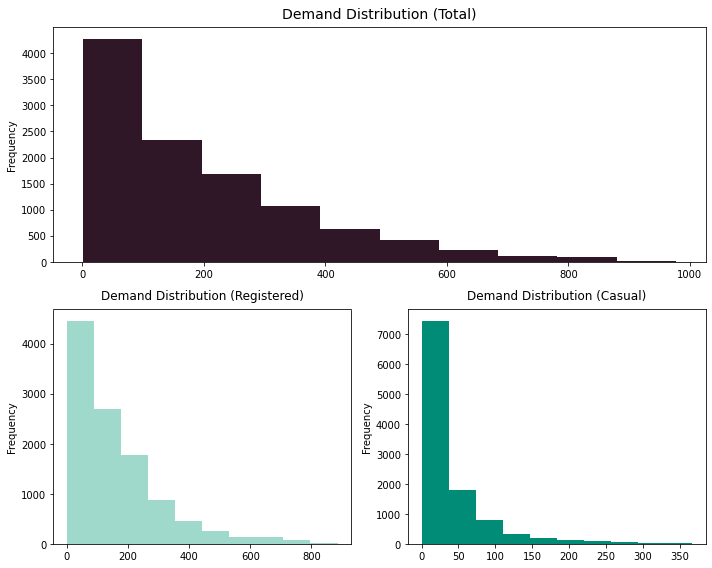

In [ ]:
# melihat distribusi dari permintaan
# langkahnya sama seperti sebelumnya

fig = plt.figure(figsize=(10, 8))
# membagi kanvas menjadi satu bagian besar di atas
ax1 = fig.add_subplot(211)

# membagi kanvas menjadi dua bagian besar di bawah
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# menggunakan library pandas untuk visualisasi
train['count'].plot(kind='hist', ax=ax1, color='#301728FF')
train['registered'].plot(kind='hist', ax=ax2, color = '#9ED9CCFF')
train['casual'].plot(kind='hist', ax=ax3, color= '#008C76FF')

ax1.set_title("Demand Distribution (Total)", fontdict={'fontsize': '14'}, pad = 10)
ax2.set_title("Demand Distribution (Registered)", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Demand Distribution (Casual)", fontdict={'fontsize': '12'}, pad = 10)

fig.tight_layout()

<p align="justify">
Dapat dilihat distribusi dari permintaan baik untuk registered maupun casual memiliki cenderung skewed ke ke kanan. Artinya kebanyakan permintaan cenderung tidak terlalu banyak namun kadang kala timbul permintaan yang tinggi.
</p>

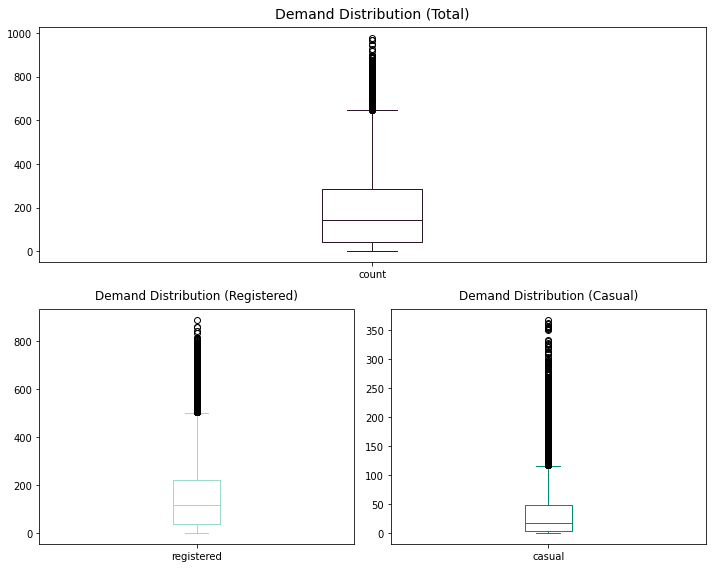

In [ ]:
# melihat distribusi dari permintaan
# langkahnya sama seperti sebelumnya

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# plot tiap data (declare ax=...)
train['count'].plot(kind='box', ax=ax1, color='#301728FF')
train['registered'].plot(kind='box', ax=ax2, color = '#9ED9CCFF')
train['casual'].plot(kind='box', ax=ax3, color= '#008C76FF')

# beri judul dari tiap data
ax1.set_title("Demand Distribution (Total)", fontdict={'fontsize': '14'}, pad = 10)
ax2.set_title("Demand Distribution (Registered)", fontdict={'fontsize': '12'}, pad = 10)
ax3.set_title("Demand Distribution (Casual)", fontdict={'fontsize': '12'}, pad = 10)

# rapihkan data
fig.tight_layout()

<p align="justify">
Hal yang sama dapat dilihat dari box plot di atas. Terlihat juga bahwasannya cukup banyak terdapat outlier. Biasanya kebanyakan model kurang baik saat menangani outlier. Untuk mengakali hal ini biasanya outlier dibuang atau data ditransformasikan. Bagaimana pengambilan keputusannya akan dijelaskan lebih lanjut pada bagian data preparation.
</p>

<p align="justify">
Terakhir masih ada beberapa hal yang belum kita ketahui dari data. Cobalah secara mandiri melakukan hal ini untuk melatih kemampuan serta pemahaman kalian. Berikut adalah list pertanyaan yang harus kalian jawab.
</p>

1.   **Bagaimana korelasi kolom waktu dengan permintaan?**  (hint lakukan langkah yang sama seperti saat analisis korelasi cuaca)
2.   **Bagaimana pola permintaan per jam pada hari libur dan non-hari libur?** (hint lakukan langkah seperti saat melihat tren per jam secara mendalam)
3. **Bagaimana pola permintaan per jam pada tiap musim?**
(hint lakukan langkah seperti saat melihat tren per jam secara mendalam)
4. **Bagaimana hubungan permintaan per jam dengan humiditas?**
(hint lakukan langkah seperti saat melihat relasi antara temperatur dan permintaan)


# Data Preparation

<p align="justify">
Pada tahap ini anda harus melakukan beberapa hal terhadap data untuk membuat model dapat mengolah data anda. Selain itu anda juga harus memastikan bahwasannya model akan menginterpretasikan data anda sebagaimana yang anda inginkan.
</p>

## Data Transformation

<p align="justify">
Sekarang anda akan melakukan data transformation atau kadang disebut juga feature engineering yaitu tahapan mengubah data menjadi format yang sesuai dengan model. Terkadang kita juga menambahkan fitur baru yang tujuannya adalah menambah kemampuan prediktif dari model.
</p>

<p align = "justify">
Mari kita lihat kembali kolom-kolom seperti apa yang kita miliki dari data.

**18. Tampilkan kolom-kolom yang ada pada data**

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<p align="justify">
Ada beberapa hal sederhana yang bisa kita lakukan yaitu mengambil hari, jam, dan bulan dari data. Selain itu kita juga melihat dari analisis sebelumnya terdapat lonjakan nilai pada jam-jam berangkat kerja. Kita dapat membuat kolom baru untuk menandakan jika jam tersebut adalah jam berangkat kerja dan jam pulang kerja.
</p>

**19. Buat lagi kolom-kolom yang berkaitan dengan datetime**

In [ ]:
# ubah dulu menjadi datetime
data['datetime'] = pd.to_datetime(data['datetime'])

data['dayofweek'] = data['datetime'].dt.dayofweek # mengambil day of week
data['month'] = data['datetime'].dt.month # mengambil month
data['hour'] = data['datetime'].dt.hour # mengambil hour
data['day'] = data['datetime'].dt.day # day
data['year'] = data['datetime'].dt.year # year

**20. Dari visualisasi didapatkan bahwasannya saat jam kerja dan pulang kerja terdapat spike dari demand. Buatlah kolom baru yang menunjukkan jam kerja dan pulang kerja untuk membantu model melakukan prediksi**

In [ ]:
data.loc[(data['hour']>= 7) & (data['hour']<= 9), 'GoToWork'] = 1 # menandakan jam berangkat kerja
data['GoToWork'].fillna(0, inplace=True) # jika  bukan jam berangkat kerja 0
data.loc[(data['hour']>= 17) & (data['hour']<= 19), 'GoHome'] = 1 # menandakan jam pulang kerja
data['GoHome'].fillna(0, inplace=True) # jika  bukan jam pulang kerja 0

<p align="justify">
Terlihat bahwasannya data memiliki kolom bertipe string/objek yaitu datetime. Lalu, kolom dengan tipe integer (bilangan bulat) yaitu season, holiday, workingday, weather. Selain itu kolom permintaan (casual, registered, dan count) memiliki tipe integer (bilangan bulat). Jika masih ingat, kolom season memiliki nilai 1,2,3,4 untuk menandakan urutan dari empat season di negara maju. Untuk weather semakin tinggi maka nilainya maka akan semakin parah kondisi cuacanya. Apabila kita menggunakan model yang linear katakanlah regresi linear, maka model akan menginterpretasikan semakin besar nilai season maka akan semakin besar/kecil nilai dari permintaan.
</p>

<p align="justify">
Tentu saja hal ini belum tentu benar, mungkin saja nilai permintaan akan besar saat season 2 (summer) tapi akan lebih kecil di season 3 (fall) dan naik lagi di season 4 (winter). Tentu hal ini bukanlah masalah apabila menggunakan model yang non-linear. Hanya saja terkadang kita lebih mempreferensikan model yang linear karena kemudahan interpretasinya. Cara untuk menangani hal ini adalah dengan membuat variable dummy. Untuk lebih jelasnya perhatikan sintaks di bawah ini.
</p>



**21. Ubah kolom season dan weather menjadi string**

In [ ]:
data['season'] = data['season'].astype('str') # mengubah tipe season menjadi string
data['weather'] = data['weather'].astype('str') # mengubah tipe weather menjadi string

**22. Buat dummy variable dari season dan weather, jangan lupa buang kolom datetime sebelum membuat dummy**

In [ ]:
# membuat dummy variable
# pertama buang dulu kolom datetime karena tidak akan terpakai
data = data.drop('datetime', axis=1).copy()
# lalu gunakan dummies
data = pd.get_dummies(data)
# Cek 5 data teratas
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,hour,day,year,GoToWork,GoHome,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,5,1,0,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,5,1,1,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,5,1,2,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,5,1,3,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,5,1,4,1,2011,0.0,0.0,1,0,0,0,1,0,0,0


<p align="justify">
Langkah selanjutnya adalah membuat semua nilai menjadi di antara 0 dan 1 agar memudahkan kita saat menentukan mana fitur yang paling prediktif terhadap variabel target. Untuk yang sudah di antara 0 dan 1 maka dibiarkan saja.
</p>

**23. Lakukan scaling terhadap seluruh kolom numerik sehingga skalanya menjadi antara 0 dan 1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaled_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'dayofweek', 'month', 'hour'] # beritahu kolom yang ingin discale

scaler = MinMaxScaler() # panggil scalernya

scaler.fit(data[scaled_cols]) # fit scaler ke data untuk membuat scaler mengetahui struktur dari data

data[scaled_cols] = scaler.transform(data[scaled_cols]) # transform data dan masukan hasil yang sudah diubah ke dalam data

**24. Lihat summary dari data untuk memastikan kolom numeriknya menjadi diantara 0 dan 1**

In [ ]:
# lihat summary dan pastikan data sudah diantara 1 dan 0
data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,hour,day,year,GoToWork,GoHome,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000
mean,0.028746,0.682752,0.487209,0.476218,0.626968,0.223340,35.721658,154.000520,189.722177,0.502030,0.503951,0.501631,15.648407,2011.503463,0.125779,0.125375,0.243015,0.254272,0.259005,0.243708,0.657065,0.262006,0.080813,0.000115
std,0.167097,0.465418,0.196277,0.171668,0.192875,0.143757,49.309987,151.455954,181.463017,0.333570,0.312285,0.300575,8.780135,0.500002,0.331610,0.331153,0.428917,0.435464,0.438101,0.429331,0.474704,0.439739,0.272555,0.010744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.326531,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000,0.166667,0.272727,0.260870,8.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.489796,0.484800,0.630000,0.228047,17.000000,116.000000,142.000000,0.500000,0.545455,0.521739,16.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.653061,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000,0.833333,0.818182,0.782609,23.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,31.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

<p align="justify">
Dalam melakukan data cleaning, terdapat beberapa hal yang perlu diperhatikan, yakni
</p>
<ol>
<li>Adanya data yang hilang (missing data)</li>
<li>Adanya nilai ekstrim (outlier)</li>
</ol>
<p align = "justify">
Kedua hal di atas perlu ditangani sebelum membangun model. Jika tidak, model yang dihasilkan bisa jadi kurang representatif.
</p>

<p align = "justify">
Pada data ini terdapat "missing value" dari windspeed. Biarpun tidak terlalu jelas namun nilai dari windspeed ada yang nol. Nilai ini tidak mungkin terjadi di dunia nyata. Ada beberapa cara yang anda bisa lakukan satu adalah mengasumsikan sensor buruk alhasil kolom ini harus dibuang. Cara kedua adalah mengganti nilai "missing value" ini dengan median dari nilai windspeed. Kami akan mencontohkan keduanya silahkan anda pilih salah satu
</p>

<p align = "justify">
Selain itu kita juga akan membuang kolom yang berkolerasi sempurna dengan kolom lain. Dapat dikatakan kolom ini tidak akan menambah informasi apa-apa kepada model alhasil dibuang saja untuk menghemat waktu komputasi.
</p>

<p align = "justify">
Untuk langkah kedua seperti yang kita lihat pada bagian data understanding, ada outlier pada permintaan. Ada beberapa cara dalam menangani outlier dan biasanya berbeda-beda untuk tiap kasus. Cara yang paling umum adalah membuang outlier. Cara ini bisa dilakukan apabila memang nilai outlier sedikit dan memang tidak bisa dikira-kira nilai yang benarnya berapa. Misalnya saat mendapatkan data nama orang pada kolom jumlah yang dibayar. Hal lainnya mengganti nilai outlier dengan nilai yang wajar. Untuk kasus ini outlier akan dibuang saja dengan asumsi sepeda terbatas sehingga tidak mungkin terdapat penyewaan sepeda yang terlalu banyak pada suatu waktu.
</p>

**25. Terdapat dua buah opsi untuk menangani missing value pada kolom windspeed. Pilih salah satu opsi yang menurut anda paling baik**

In [ ]:
# mengganti nilai windspeed yang nol dengan mediannya

# Opsi 1
# buat windspeed yang nol menjadi null

# data.loc[data['windspeed'] == 0, 'windspeed'] = np.NaN
# data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

# opsi 2
# membuang kolom windspeed
data.drop(['windspeed'], axis=1, inplace=True, errors='ignore')

**26. Buang kolom atemp dan juga outlier**

In [ ]:
#membuang kolom atemp
data.drop(['atemp'], axis=1, inplace=True, errors='ignore')

# ingat outlier hanya berada pada data train saja bukan pada data test
# lalu outlier hanya terjadi jika permintaan per jam sangat besar meningat permintaan kecil itu wajar
# oleh karena itu hanya buang outlier yang ada pada data train saja

data = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())]


## Splitting Train and Validation

<p align="justify">
Langkah selanjutnya adalah membuat data train dan validation. Data train akan digunakan untuk melatih model dan data validation akan digunakan untuk mengukur performansi dari model kita sebelum kita cek terhadap data test. Biasanya data validation ini disebut juga data test jika memang kita tidak memiliki data test. Ada beberapa hal yang bisa dijadikan konsiderasi sebelum memisah data train dan validation. Yaitu menentukan mana variabel target dan mana variabel prediktor.
</p>

<p align="justify">
Saat modelling kita harus menentukan mana variabel target dan mana variabel prediktor yang akan digunakan. Pada kasus ini kita bisa melakukan beberapa alternatif. Alternatif yang pertama adalah membuat satu buah model. Yaitu model dengan variable target total demand (count) dan variabel prediktor kolom sisanya. Alternatif kedua adalah membuat dua buah model. Yaitu model pertama dengan variable target demand casual (casual) dan variabel prediktor kolom sisanya. Model kedua dengan variabel target demand registered (registered) dan variabel prediktor kolom sisanya. Lalu hasil prediksi dari kedua model kita tambahkan (jangan lupa untuk mentransformasi balik kolom casual dan registered sebelum ditambahkan).
</p>

<p align="justify">
Untuk kasus ini kita akan mencoba alternatif satu. Anda bisa mencoba alternatif dua dan membandingkan mana performa model yang lebih bagus.

**27. Buat data training dan validation**

In [ ]:
data

,holiday,workingday,temp,humidity,casual,registered,count,dayofweek,month,hour,day,year,GoToWork,GoHome,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,0.224490,0.81,3,13,16,0.833333,0.0,0.000000,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
1,0,0,0.204082,0.80,8,32,40,0.833333,0.0,0.043478,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
2,0,0,0.204082,0.80,5,27,32,0.833333,0.0,0.086957,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
3,0,0,0.224490,0.75,3,10,13,0.833333,0.0,0.130435,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
4,0,0,0.224490,0.75,0,1,1,0.833333,0.0,0.173913,1,2011,0.0,0.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,0,1,0.244898,0.60,30,184,214,0.000000,1.0,0.826087,31,2012,0.0,1.0,1,0,0,0,0,1,0,0
6434,0,1,0.244898,0.60,14,150,164,0.000000,1.0,0.869565,31,2012,0.0,0.0,1,0,0,0,0,1,0,0
6435,0,1,0.244898,0.60,10,112,122,0.000000,1.0,0.913043,31,2012,0.0,0.0,1,0,0,0,1,0,0,0
6436,0,1,0.244898,0.56,11,108,119,0.000000,1.0,0.956522,31,2012,0.0,0.0,1,0,0,0,1,0,0,0


In [ ]:
# menggunakan alternatif pertama
from sklearn.model_selection import train_test_split # untuk memisah data menjadi train dan validation set

X = data.drop(['casual', 'registered', 'count'], axis=1) # Variabel prediktor

y = data['count'] # Variable target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) #memisah data menjadi train dan validation

# Modelling

<p align="justify">
Kali ini kita akan menggunakan dua buah model sederhana yaitu model regresi lasso dan regression tree. Kedua model ini sangatlah sederhana namun merupakan dasar pada pembelajaran mesin. Harapannya anda dapat mengetahui konsep 'learning' dan 'reguralisasi' dari model ini. Teori dari tiap model tidak akan dijelaskan dengan detil jika ingin mengetahui teori dengan detil dapat membaca buku <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">ISLR</a>.
</p>

**Regresi lasso**
<p align="justify">
Salah satu teknik pemodelan prediktif yang umum digunakan ketika mempelajari machine learning adalah regresi. Regresi digunakan untuk mengetahui faktor-faktor (atau prediktor) yang dapat mempengaruhi hasil atau output yang diharapkan. Bentuk persamaan regresi dapat berupa univariat atau multivariat, bergantung jumlah prediktor yang diakomodasi. Berikut adalah persamaan umum regresi: </p><br>

<p align="center">$\hat{y}_i = \sum_{j=1}^Na_{j}x_{ij}+ b$</p>

<p align="justify">
Regresi ini akan mencari nilai dari parameter $a$ dan $b$ yang meminimasi $\sum_i^N(y_i-\hat{y}_i)^2$. Alhasil sering disebut sebagai metode <i>ordinary least square</i> (OLS). Sayangnya metode ini cenderung tidak sempurna apabila terdapat banyak kolom. Untuk kasus data yang memiliki banyak kolom biasanya digunakan metode regresi lasso. Regresi lasso menyusutkan koefisien regresi dari variabel bebas yang memiliki korelasi tinggi menjadi tepat pada nol atau mendekati nol. Berikut adalah visualisasi pencarian koefisien pada regresi ini
</p>

<figure>
<center>
<img src="https://hackernoon.com/hn-images/0*D7zG46WrdKx54pbU.gif" width="800" />
<figcaption> Gambar 2 - Sthocastic Gradient Descent (sumber: alykhantejani.github.io) </figcaption></center>
</figure>

**28. Bangun model regresi lasso**

In [ ]:
#membangun fungsi regresi lasso dengan linear_model
from sklearn.linear_model import Lasso

model_la = Lasso(alpha=0.5, max_iter=200000000) #menspesifikasikan hyperparameter model

model_la.fit(X_train, y_train)

#menampilkan koefisien dan konstanta regresi
lasso_result = pd.DataFrame()
predictor = ['intercept'] + list(X.columns)
coef = [model_la.intercept_] + list(model_la.coef_)

lasso_result['predictor'] = predictor
lasso_result['coefficient'] = coef

# tampilkan dataframe
lasso_result

,predictor,coefficient
0,intercept,-136152.578800
1,holiday,-0.000000
2,workingday,-0.000000
3,temp,271.842891
4,humidity,-121.819551
5,dayofweek,7.892228
6,month,0.000000
7,hour,88.810322
8,day,-0.269666
9,year,67.720164


<p align="justify">
Berhubung setiap kolom sudah berskala sama maka dapat kita tentukan mana variable yang paling penting. Variable yang paling penting adalah yang nilai absolutnya paling besar. Dalam kasus ini temperatur, humidity, GoHome, GoToWork, Hour, dan Year. Kita juga bisa menginterpretasikan apa yang terjadi bila nilai suatu variable dinaikan atau diturunkan. Misalnya kita bisa menyimpulkan nilai permintaan akan naik apabila tahun semakin besar dan akan turun apabila nilai humiditas semakin besar.
</p>

**Regression Tree**

<p align="justify">
Beberapa orang mengira bahwasannya metode tree-based hanya digunakan untuk klasifikasi namun sebenarnya dapat juga digunakan untuk regresi. Jika anda sudah mengenal decision tree maka anda hanya perlu mensubtitusi gini impurity dengan mean squared error. Sisanya sama saja.
</p>

<p align="justify">
Jika anda masih belum familiar jangan khawatir. Tujuan dari model ini sangatlah sederhana. Model ini mencari suatu decision rule terbaik untuk memprediksi suatu nilai. Decision rule merupakan serangkaian kondisi if-else. Misalkan apabila saya belajar >8 jam per hari maka IP semester ini akan >3.5. Jika saya belajar 8.5 jam maka regression tree akan memprediksi IP saya sebesar 3.5. Anda ingin mencari decison rule seperti ini untuk memprediksi suatu nilai. Rule dari regressin tree akan membuat sebuah batasan seperti pada Gambar 3. Rata-rata nilai pada batasan tersebut dikurangi dengan nilai sebenarnya merupakan kriteria penentuan batasan. Akan dicari nilai rata-rata pada batasan dikurangi nilai sebenarnya yang minimum.
</p>

<figure>
<center>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_0011.png" width="500" />
<figcaption> Gambar 2 - Regression Tree Boundary (sumber: scikit-learn.org) </figcaption></center>
</figure>

<p align="justify">
Decision tree ini cenderung untuk <i>overfitting</i> metode untuk reguralisasinya adalah dengan membatasi jumlah boundary yang dibuat. Caranya adalah dengan membuat max_depth (tinggi dari pohon) yang kecil atau n_leaves (jumlah cabang pohon) yang kecil. Dapat dilihat juga boundary dari decision tree pasti linear. Apabila ingin model decision tree yang jauh lebih baik dapat digunakan model kembangannya dengan nama random forest.
</p>

<p align="justify">
Gambar 3 adalah contoh hasil regression tree untuk memprediksi harga suatu mobil. Pertama akan dicek berapa displacement (total kilometer) dari mobil yang dimiliki. Apabila lebih besar dari rata-rata (190.5) maka akan dicek horsepower yang dimiliki. Jika lebih besar dari 127 maka harga mobil tersebut 14.537 USD sedangkan jika lebih kecil maka harganya 19.533 USD. Untuk penjelasan dengan visualisasi yang menarik bisa dilihat di <a href="https://www.youtube.com/watch?v=g9c66TUylZ4&t=1s">StatQuest</a>.
</p>
<figure>
<center>
<img src="https://i.ytimg.com/vi/1p_cvXAjNTM/hqdefault.jpg" width="300" />
<figcaption> Gambar 3 - Regression Tree Result (sumber: StatQuest.com) </figcaption></center>
</figure>



**29. Bangun model Decision Tree Regressor**

In [ ]:
# memasukan model regression tree
from sklearn.tree import DecisionTreeRegressor
# memasukan library untuk menggambar decision tree
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

# buat model decision tree
# kriteria boundary yang digunakan mse
dt = DecisionTreeRegressor(criterion='mse', max_features='sqrt', max_depth=3, random_state=5)
dt.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

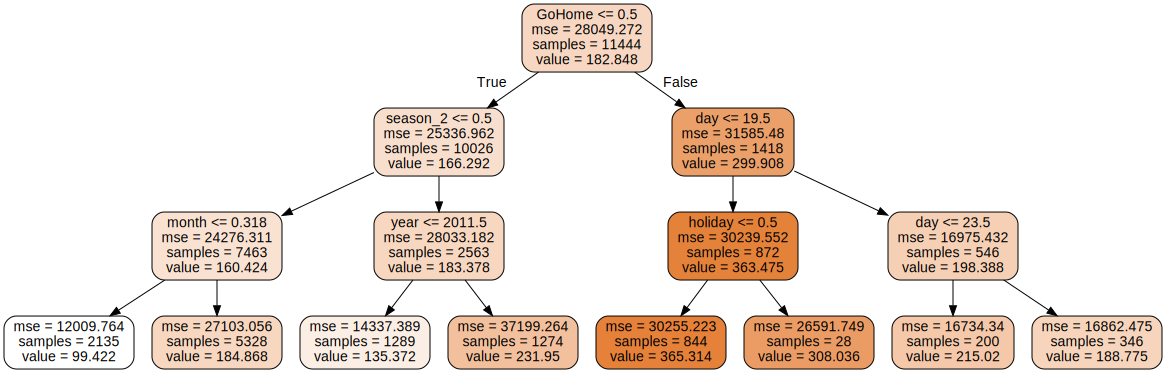

In [ ]:
# Membuat gambar decision tree yang  lebih jelas
import graphviz

# DOT data
dot_data = tree.export_graphviz(dt,
                                feature_names=X_train.columns,
                                class_names=True,
                                rounded=True,
                                filled=True)

# Menggambar decision tree
graph = graphviz.Source(dot_data, format="png")
graph

**30. Visualisasikan decision tree (OPTIONAL Akan memakan banyak RAM dan CPU sehingga jalankan apabila komputer anda kuat)**

In [ ]:
# Jalankan jika RAM dan CPU anda cukup besar
# viz = dtreeviz(dt,
#                X_train.values,
#                y_train.values,
#                target_name='Bike Demand',  # this name will be displayed at the leaf node
#                feature_names=X_train.columns
#               )

In [ ]:
# Jalankan jika RAM dan CPU anda cukup besar
# viz

<p align = "justify">
Python memiliki suatu package untuk memvisualisasikan decision tree beserta dengan split regionnya yaitu dtreeviz. Package ini cukup berat jadi apabila anda menggunakan komputer pribadi pastikan RAM anda minimal 8 GB. Dapat dilihat bahwasannya model mula-mula memisahkan berdasarkan apakah jam sekarang adalah jam Go-Home atau bukan lalu dilihat apakah sekarang musim semi atau bukan. Jika keduanya iya maka akan dicek sedang holiday atau bukan jika ya maka demand diperkirakan sebesar 359.19 jika bukan maka demand diperkirakan sebesar 406.67. Cukup logis jika kita perhatikan aturan if-else dari decision tree ini karena hasilnya sudah sesuai dengan analisis kita sebelumnya. Hanya saja decision tree yang anda lihat ini merupakan decision tree yang disederhanakan (hanya 3 max depth) karena jika menampilkan decision tree yang full akan membuat laptop anda hang. Untuk melihat fitur apa yang paling penting dapat menjalankan perintah di bawah ini.
</p>

**31. Lihat mana variable yang paling penting dari decision tree yang dibuat**

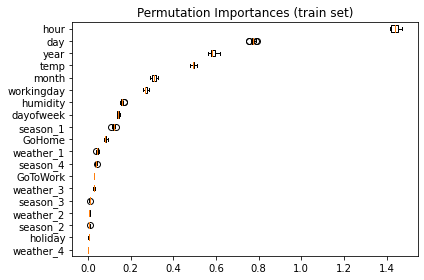

In [ ]:
from sklearn.inspection import permutation_importance

dt = DecisionTreeRegressor(criterion='mse', random_state=15)
dt.fit(X_train, y_train)

result = permutation_importance(dt, X_train, y_train, n_repeats=20,
                                random_state=15, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()




<p align="justify">
Dapat dilihat fitur yang paling penting adalah ang berkaitan dengan waktu serta temperatur. Pemerintah dapat menggunakan model lasso ataupun decision tree regressor untuk menentukan apakah pada waktu tertentu permintaan cukup kecil sehingga beberapa sepeda bisa kita lakukan maintanance. Lalu, kita juga dapat melihat dari model lasso bahwasannya tren dari permintaan cenderung naik. Hal ini ditandai dengan variabel year yang memiliki koefisien positif.
</p>

## Model Evaluation

<p align="justify">
Pertanyaan selanjutnya adalah dari dua model di atas manakah yang dapat dipercaya? untuk menjawab hal ini perlu dilakukan evaluasi model. Kali ini evaluasi akan dilakukan menggunakan RMSE (root mean squared error) yaitu $\sqrt{\sum_i^n(\hat{y}_i - y_i)^2}$. RMSE mudah sekali untuk diinterpretasikan jika bernilai satu artinya model rata-rata salah memprediksi nilai demand sebanyak satu satuan. Semakin kecil nilai RMSE maka akan semakin baik model yang kita miliki. Mula-mula kita akan mengecek nilai RMSE terhadap validation dataset. Setelah itu baru kita cek terhadap test data set.
</p>

**32. Evaluasi model dengan menggunakan data validasi**

In [ ]:
from sklearn.metrics import mean_squared_error # mengambil package untuk menghitung error

#memprediksi nilai validation set dengan model yang telah dibuat
y_pred_la = model_la.predict(X_val)
y_pred_dt = dt.predict(X_val)

#menghitung nilai performansi model terhadap data validation
print("RMSE Lasso Regression (Validation): ", np.sqrt(mean_squared_error(y_val,y_pred_la)))
print("RMSE Regression Tree (Validation): ", np.sqrt(mean_squared_error(y_val,y_pred_dt)))


RMSE Lasso Regression (Validation):  133.68473656941202
RMSE Regression Tree (Validation):  73.73338402053886


<p align="justify">
Dapat dilihat bahwasannya model regression tree memiliki performa yang jauh lebih baik dibandingkan lasso baik pada validation set. Alhasil dapat dikatakan untuk melihat apakah pada hari dan jam tertentu cocok untuk melakukan <i>maintanance</i> dapat digunakan regression tree.
</p>

<p align="justify">
Kesimpulannya manajemen memang harus menyiapkan sepeda lebih banyak berhubung pada saat eksplorasi data terlihat bahwasannya tren permintaan sepeda cenderung meningkat. Selain itu, terlihat juga pada model lasso variabel year memiliki koefisien positif artinya semakin besar tahun maka permintaan akan semakin meningkat. Lalu, pada decision tree variabel day serta year juga menjadi variabel yang penting. Apabila kita melihat decsion rule yang dihasilkan dapat kita perkirakan jika day dan year semakin tinggi begitu juga permintaan akan sepeda. Untuk mengetahui apakah pada kondisi tertentu dapat dilakukan maintanance, perusahaan dapat mencoba-coba memasukan nilai pada model dan melihat berapa permintaan dari sepeda pada kondisi dan tanggal tersebut.
</p>